<a href="https://colab.research.google.com/github/maoya23/machinelearning/blob/master/classification_by_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

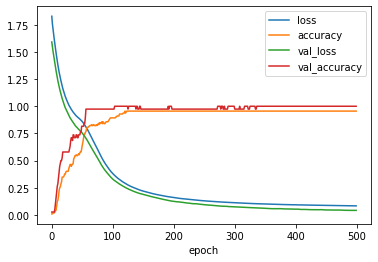

loss            0.082987
accuracy        0.955357
val_loss        0.041581
val_accuracy    1.000000
Name: 499, dtype: float64
0.9666666666666667


In [10]:
#kerasによる分類

import numpy as np
import pandas as pd
import statsmodels.api as sm
from keras import callbacks,layers,losses,models
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

tmp=sm.datasets.get_rdataset('iris','datasets').data
my_data=shuffle(tmp)

my_scaler=StandardScaler()
X=my_scaler.fit_transform(my_data.drop(columns=['Species']))

my_enc=LabelEncoder() #文字列や数値で表されたラベルを数値に変換するもの
y=my_enc.fit_transform(my_data['Species'])  #Speciesを数値に変換する

my_model=models.Sequential()
my_model.add(layers.Dense(units=3,activation='relu',input_shape=[4]))#特徴量４で分類する
my_model.add(layers.Dense(units=3,activation='softmax'))#出力層は３

my_model.compile(
    loss='sparse_categorical_crossentropy',#正解率の最大化ではなく損失関数の最小化を目指す交差エントロピーを損失関数に設定する
    optimizer='rmsprop',
    metrics=['accuracy'])  #訓練時の正解率の変化を可視化する

my_cb=callbacks.EarlyStopping(patience=20,restore_best_weights=True)

my_history=my_model.fit(
    x=X,
    y=y,
    validation_split=0.25,
    batch_size=10,
    epochs=500,
    callbacks=[my_cb],
    verbose=0)

tmp=pd.DataFrame(my_history.history)
tmp.plot(xlabel='epoch')
plt.show()

print(tmp.iloc[-1, ])

tmp=my_model.predict(X)
y_=np.argmax(tmp,axis=-1)
print((y_==y).mean())

